# ----> BRAIN TUMOUR DETECTION USING BRAIN MRI IMAGES <----

# Load Modules

In [1]:
import matplotlib.pyplot as plt
import os
import warnings
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# About Dataset

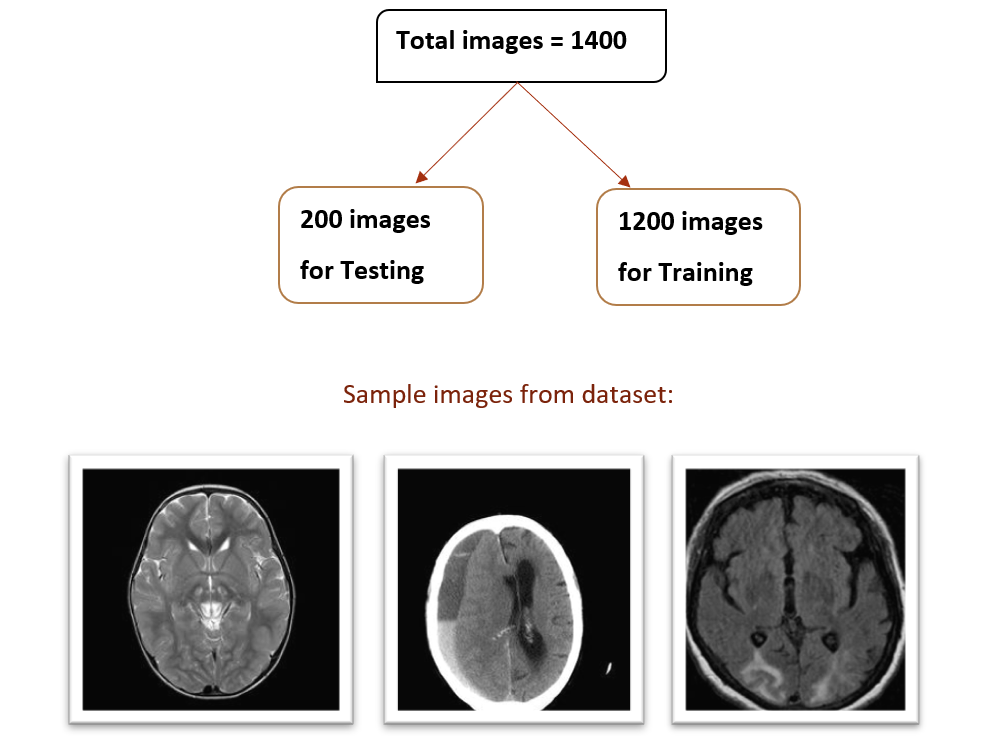

# Prepare/collect data

In [2]:
path = os.listdir('brain_tumor/Training/') #get the list of all files in the specified directory.
classes = {'no_tumor':0, 'pituitary_tumor':1}

# values are converted to 0 and 1

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200)) # resize the image
        X.append(img)
        Y.append(classes[cls]) 

In [4]:
np.shape(X)

(1223, 200, 200)

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [6]:
print(np.unique(Y))

[0 1]


In [7]:
print(np.unique(X))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

# Visualize data

In [8]:
X.shape, X_updated.shape

((1223, 200, 200), (1223, 40000))

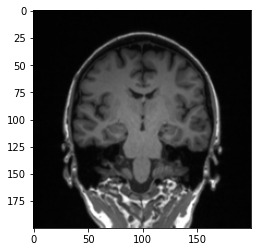

In [9]:
plt.imshow(X[4], cmap='gray')

# Prepare data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape 

(1223, 40000)

# Split Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((978, 40000), (245, 40000))

# Feature Scaling

In [17]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


#                      MACHINE LEARNING ALGORITHMS

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)
predictions1 = lg.predict(xtest)

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9673469387755103


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix for logistic regression: \n ", confusion_matrix(ytest, predictions1))
print('\n')
print("----------------Classification Report------------------ \n ")
print(classification_report(ytest, predictions1))

Confusion Matrix for logistic regression: 
  [[ 74   7]
 [  1 163]]


----------------Classification Report------------------ 
 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        81
           1       0.96      0.99      0.98       164

    accuracy                           0.97       245
   macro avg       0.97      0.95      0.96       245
weighted avg       0.97      0.97      0.97       245



### GRAPH

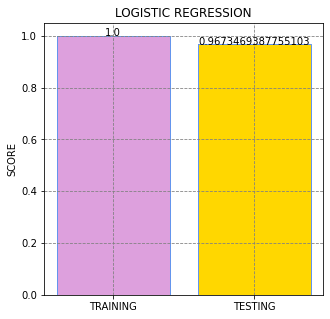

In [22]:
# function to add value labels
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [lg.score(xtrain, ytrain),lg.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['plum', 'gold'], edgecolor='cornflowerblue')
plt.title('LOGISTIC REGRESSION')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC

In [24]:
sv = SVC()
sv.fit(xtrain, ytrain)
predictions= sv.predict(xtest)

In [25]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.99079754601227
Testing Score: 0.9591836734693877


In [26]:
print("Confusion Matrix for svm: \n", confusion_matrix(ytest, predictions))
print('\n')
print("----------------Classification Report------------------ \n ")
print(classification_report(ytest, predictions))

Confusion Matrix for svm: 
 [[ 73   8]
 [  2 162]]


----------------Classification Report------------------ 
 
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        81
           1       0.95      0.99      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.94      0.95       245
weighted avg       0.96      0.96      0.96       245



### GRAPH

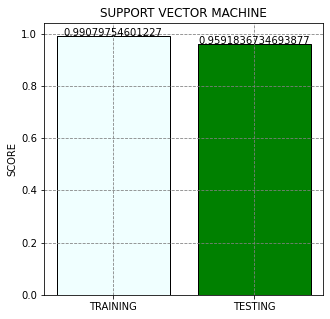

In [27]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [sv.score(xtrain, ytrain),sv.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['azure', 'green'], edgecolor='black')
plt.title('SUPPORT VECTOR MACHINE')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# K Nearest Neighbors (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain, ytrain)
predictions2 = knn.predict(xtest)

In [29]:
print("Training Score:", knn.score(xtrain, ytrain))
print("Testing Score:", knn.score(xtest, ytest))

Training Score: 0.9938650306748467
Testing Score: 0.963265306122449


In [30]:
print("Confusion Matrix for knn: \n", confusion_matrix(ytest, predictions2))
print('\n')
print("----------------Classification Report------------------ \n ")
print(classification_report(ytest, predictions2))

Confusion Matrix for knn: 
 [[ 75   6]
 [  3 161]]


----------------Classification Report------------------ 
 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        81
           1       0.96      0.98      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.95      0.96       245
weighted avg       0.96      0.96      0.96       245



### GRAPH

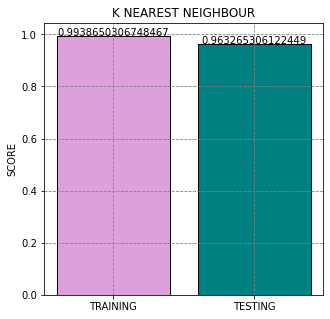

In [31]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [knn.score(xtrain, ytrain),knn.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['plum', 'teal'], edgecolor='black')
plt.title('K NEAREST NEIGHBOUR')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# Random Forest

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(xtrain, ytrain)
predictions3 = rfc.predict(xtest)

In [33]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Testing Score:", rfc.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9795918367346939


In [34]:
print("Confusion Matrix for random forest: \n", confusion_matrix(ytest, predictions3))
print('\n')
print("----------------Classification Report------------------ \n ")
print(classification_report(ytest, predictions3))

Confusion Matrix for random forest: 
 [[ 79   2]
 [  3 161]]


----------------Classification Report------------------ 
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.99      0.98      0.98       164

    accuracy                           0.98       245
   macro avg       0.98      0.98      0.98       245
weighted avg       0.98      0.98      0.98       245



### GRAPH

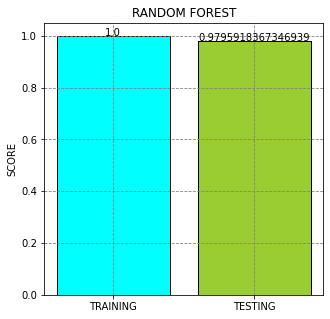

In [35]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [rfc.score(xtrain, ytrain),rfc.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['aqua', 'yellowgreen'], edgecolor='black')
plt.title('RANDOM FOREST')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
predictions4 = nb.predict(xtest)

In [37]:
print("Training Score:", nb.score(xtrain, ytrain))
print("Testing Score:", nb.score(xtest, ytest))

Training Score: 0.9161554192229039
Testing Score: 0.9142857142857143


In [38]:
print("Confusion Matrix for Naive Bayes: \n", confusion_matrix(ytest, predictions4))
print('\n')
print("----------------Classification Report------------------ \n ")
print(classification_report(ytest, predictions4))

Confusion Matrix for Naive Bayes: 
 [[ 65  16]
 [  5 159]]


----------------Classification Report------------------ 
 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        81
           1       0.91      0.97      0.94       164

    accuracy                           0.91       245
   macro avg       0.92      0.89      0.90       245
weighted avg       0.92      0.91      0.91       245



### GRAPH

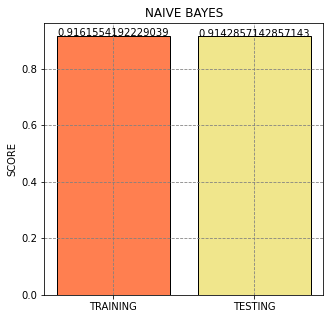

In [39]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [nb.score(xtrain, ytrain),nb.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['coral', 'khaki'], edgecolor='black')
plt.title('NAIVE BAYES')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# Decision Tree

In [40]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(xtrain,ytrain)
predictions5 = nb.predict(xtest)

In [41]:
print("Training Score:", tree.score(xtrain, ytrain))
print("Testing Score:", tree.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.963265306122449


In [42]:
print("Training Score:", tree.score(xtrain, ytrain))
print("Testing Score:", tree.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.963265306122449


### GRAPH

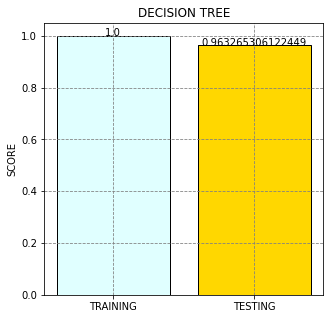

In [43]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [tree.score(xtrain, ytrain),tree.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['lightcyan', 'gold'], edgecolor='black')
plt.title('DECISION TREE')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# Linear Regression

In [44]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(xtrain,ytrain)
predictions6 = linear.predict(xtest)

In [45]:
print("Training Score:", linear.score(xtrain, ytrain))
print("Testing Score:", linear.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.7640438115492877


### GRAPH

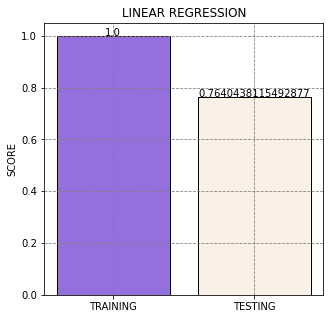

In [46]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['TRAINING', 'TESTING']
score_value= [linear.score(xtrain, ytrain),linear.score(xtest, ytest)]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("SCORE")
plt.bar(score,score_value,color=['mediumpurple', 'linen'], edgecolor='black')
plt.title('LINEAR REGRESSION')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# Accuracy Comparison of all Algorithms

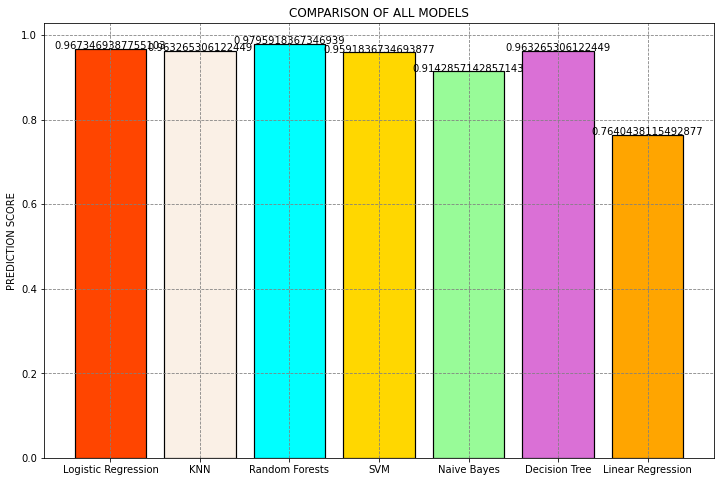

In [47]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['Logistic Regression', 'KNN', 'Random Forests', 'SVM', 'Naive Bayes', 'Decision Tree' ,'Linear Regression']
score_value= [lg.score(xtest, ytest), knn.score(xtest, ytest),  rfc.score(xtest, ytest), sv.score(xtest, ytest), nb.score(xtest, ytest), tree.score(xtest, ytest) ,linear.score(xtest, ytest)]

plt.figure(figsize=(12, 8))
plt.bar(score,score_value, )
plt.xticks(score)
plt.ylabel("PREDICTION SCORE")
plt.bar(score,score_value,color=['orangered', 'linen','cyan','gold','palegreen','orchid','orange'], edgecolor='black',linewidth='1.2')
plt.title('COMPARISON OF ALL MODELS')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

#                                              DEEP LEARNING

# ANN ( Artificial Neural Network )

In [205]:
path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

## Data Preprocessing 

In [206]:
X = []  # we will append all images here
Y = []  # 0(no tumour) for first iteration and 1(tumour) for second iteration
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0) # 0 is for reading images in 2-dimension
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [207]:
np.shape(X)

(1222, 200, 200)

In [208]:
X[0].shape

(200, 200)

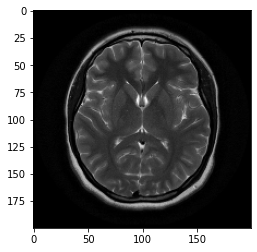

In [209]:
plt.imshow(X[12], cmap='gray')  
# The imshow() function in pyplot module of matplotlib library is used to display data as an image;
# i.e. on a 2D regular raster

In [210]:
import tensorflow as tf
from tensorflow import keras

In [211]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [212]:
xtrain[0].shape

(200, 200)

In [213]:
xtrain[0]

array([[ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  2,  2,  1],
       [ 1,  1,  1, ...,  5,  3,  2],
       ...,
       [ 6, 10,  7, ...,  5,  5,  5],
       [ 3,  5,  3, ...,  3,  3,  3],
       [ 0,  0,  0, ...,  1,  1,  1]], dtype=uint8)

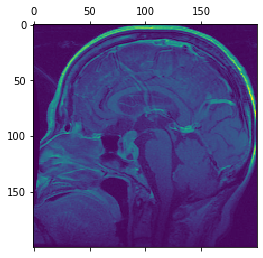

In [214]:
plt.matshow(xtrain[0])

## Feature Scaling

In [215]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)
xtrain = xtrain /255  # feature scaling 
xtest = xtest /255

In [216]:
xtrain[0]  

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00784314, 0.00784314,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.01960784, 0.01176471,
        0.00784314],
       ...,
       [0.02352941, 0.03921569, 0.02745098, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.01176471, 0.01960784, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157]])

In [217]:
xtrain_flattened = xtrain.reshape(len(xtrain), 200*200)
xtest_flattened = xtest.reshape(len(xtest), 200*200)

In [218]:
xtrain_flattened.shape

(977, 40000)

In [219]:
xtrain_flattened[0]

array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157])

## Basic model withour any hidden layer

In [220]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(40000,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(xtrain_flattened), np.array(ytrain), epochs=15)

Epoch 1/15
31/31 [==============================] - 1s 7ms/step - loss: 1.0358 - accuracy: 0.7513
Epoch 2/15
31/31 [==============================] - 0s 7ms/step - loss: 0.2424 - accuracy: 0.9273
Epoch 3/15
31/31 [==============================] - 0s 6ms/step - loss: 0.1110 - accuracy: 0.9713
Epoch 4/15
31/31 [==============================] - 0s 7ms/step - loss: 0.0753 - accuracy: 0.9836
Epoch 5/15
31/31 [==============================] - 0s 8ms/step - loss: 0.0637 - accuracy: 0.9877
Epoch 6/15
31/31 [==============================] - 0s 6ms/step - loss: 0.0496 - accuracy: 0.9898
Epoch 7/15
31/31 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9898
Epoch 8/15
31/31 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9898
Epoch 9/15
31/31 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9959
Epoch 10/15
31/31 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.9990
Epoch 11/15
31/31 [

In [221]:
model.evaluate(np.array(xtest_flattened),np.array( ytest))

8/8 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9714


[0.09520997107028961, 0.9714285731315613]

## Adding 1 hidden layer

In [222]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(40000,), activation='relu'),
    keras.layers.Dense(2,  activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(xtrain_flattened), np.array(ytrain), epochs=15)

Epoch 1/15
31/31 [==============================] - 1s 28ms/step - loss: 4.1677 - accuracy: 0.6581
Epoch 2/15
31/31 [==============================] - 1s 27ms/step - loss: 0.7219 - accuracy: 0.8639
Epoch 3/15
31/31 [==============================] - 1s 27ms/step - loss: 0.2166 - accuracy: 0.9427
Epoch 4/15
31/31 [==============================] - 1s 28ms/step - loss: 0.1155 - accuracy: 0.9672
Epoch 5/15
31/31 [==============================] - 1s 27ms/step - loss: 0.1094 - accuracy: 0.9693
Epoch 6/15
31/31 [==============================] - 1s 28ms/step - loss: 0.0628 - accuracy: 0.9795
Epoch 7/15
31/31 [==============================] - 1s 29ms/step - loss: 0.0325 - accuracy: 0.9887
Epoch 8/15
31/31 [==============================] - 1s 34ms/step - loss: 0.0157 - accuracy: 0.9980
Epoch 9/15
31/31 [==============================] - 1s 34ms/step - loss: 0.0086 - accuracy: 0.9990
Epoch 10/15
31/31 [==============================] - 1s 33ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 11/

In [223]:
model.evaluate(np.array(xtest_flattened),np.array( ytest))

8/8 [==============================] - 0s 10ms/step - loss: 0.1259 - accuracy: 0.9673


[0.12589013576507568, 0.9673469662666321]

#### Acuracy Increased from 96% to 97% after adding 1 hidden Layer

## Adding 2 hidden layers

In [224]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(40000,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2,  activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(xtrain_flattened), np.array(ytrain), epochs=15)

Epoch 1/15
31/31 [==============================] - 2s 52ms/step - loss: 1.2634 - accuracy: 0.7677
Epoch 2/15
31/31 [==============================] - 2s 53ms/step - loss: 0.2364 - accuracy: 0.9099
Epoch 3/15
31/31 [==============================] - 2s 52ms/step - loss: 0.2074 - accuracy: 0.9304
Epoch 4/15
31/31 [==============================] - 2s 53ms/step - loss: 0.1067 - accuracy: 0.9672
Epoch 5/15
31/31 [==============================] - 2s 52ms/step - loss: 0.0811 - accuracy: 0.9724
Epoch 6/15
31/31 [==============================] - 2s 52ms/step - loss: 0.0284 - accuracy: 0.9928
Epoch 7/15
31/31 [==============================] - 2s 52ms/step - loss: 0.0113 - accuracy: 0.9990
Epoch 8/15
31/31 [==============================] - 2s 52ms/step - loss: 0.0091 - accuracy: 0.9990
Epoch 9/15
31/31 [==============================] - 2s 53ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 10/15
31/31 [==============================] - 2s 62ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 11/

## Evaluation Score

In [225]:
model.evaluate(np.array(xtest_flattened),np.array( ytest))

8/8 [==============================] - 0s 14ms/step - loss: 0.1603 - accuracy: 0.9714


[0.16028934717178345, 0.9714285731315613]

#### There was no effect on accuracy after adding 1 more hidden layer , it remained 97% only

### GRAPH 

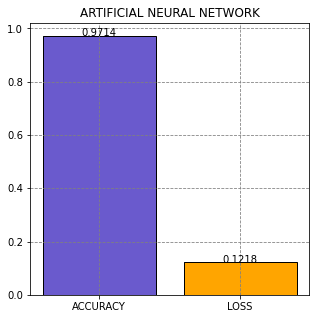

In [226]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['ACCURACY', 'LOSS']
score_value= [0.9714,0.1218]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.bar(score,score_value,color=['slateblue', 'orange'], edgecolor='black')
plt.title('ARTIFICIAL NEURAL NETWORK')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

## Predictions

In [227]:
ypredicted = model.predict(xtest_flattened)
ypredicted[0]

array([0.8659922, 0.9999949], dtype=float32)

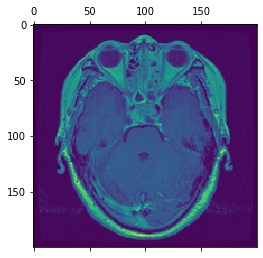

In [228]:
plt.matshow(xtest[0])

# CNN (Convolutional Neural Network)

## Data Preprocessing

In [2]:
#Prepare/collect data
path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])
X = np.array(X)
Y = np.array(Y)

In [3]:
#Prepare data
X_updated = X.reshape(len(X), -1)
#Split Data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [4]:
#Importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [5]:
# building the input vector from the 200x200 pixels
Xtrain = xtrain.reshape(-1, 200, 200, 1)
Xtest = xtest.reshape(xtest.shape[0], 200, 200, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [6]:
Xtrain.shape

(977, 200, 200, 1)

In [7]:
#Feature Scaling
Xtrain = Xtrain/255
Xtest = Xtest/255

In [8]:
print(Xtest.shape)
ytest.shape


(245, 200, 200, 1)


(245,)

In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", ytrain.shape)
Ytrain = np_utils.to_categorical(ytrain, n_classes)
Ytest = np_utils.to_categorical(ytest, n_classes)
print("Shape after one-hot encoding: ", Ytrain.shape)

Shape before one-hot encoding:  (977,)
Shape after one-hot encoding:  (977, 10)


## Setting Convolutional Layer

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [11]:
# convolutional layer_1
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(200, 200, 1)))

In [12]:
# convolutional layer_2
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [13]:
# convolutional layer_3
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [14]:
# flatten output of conv
model.add(Flatten())

## Setting Hidden Layers

In [15]:
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

In [16]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
# training the model for 10 epochs
model.fit(Xtrain, Ytrain, batch_size=128, epochs=10, validation_data=(Xtest, Ytest))

Epoch 1/10
8/8 [==============================] - 579s 74s/step - loss: 3.1163 - accuracy: 0.4841 - val_loss: 0.9197 - val_accuracy: 0.6694
Epoch 2/10
8/8 [==============================] - 544s 68s/step - loss: 0.8446 - accuracy: 0.5937 - val_loss: 0.7954 - val_accuracy: 0.6694
Epoch 3/10
8/8 [==============================] - 375s 46s/step - loss: 0.7298 - accuracy: 0.6776 - val_loss: 0.7086 - val_accuracy: 0.8286
Epoch 4/10
8/8 [==============================] - 974s 131s/step - loss: 0.6053 - accuracy: 0.7093 - val_loss: 0.5617 - val_accuracy: 0.7388
Epoch 5/10
8/8 [==============================] - 403s 50s/step - loss: 0.4671 - accuracy: 0.7902 - val_loss: 0.3688 - val_accuracy: 0.8408
Epoch 6/10
8/8 [==============================] - 404s 50s/step - loss: 0.3062 - accuracy: 0.8802 - val_loss: 0.2231 - val_accuracy: 0.8898
Epoch 7/10
8/8 [==============================] - 428s 53s/step - loss: 0.2360 - accuracy: 0.9058 - val_loss: 0.1756 - val_accuracy: 0.9388
Epoch 8/10
8/8 [===

## Evaluation Score

In [21]:
model.evaluate((Xtest),( Ytest))

8/8 [==============================] - 7s 923ms/step - loss: 0.0991 - accuracy: 0.9673


[0.09914561361074448, 0.9673469662666321]

## GRAPH

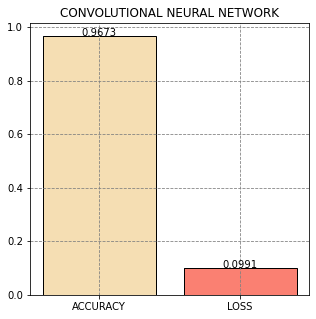

In [22]:
def addlabels(score,score_value):
    for i in range(len(score)):
        plt.text(i, score_value[i], score_value[i], ha = 'center')

score=['ACCURACY', 'LOSS']
score_value= [0.9673,0.0991]

plt.figure(figsize=(5, 5))
plt.bar(score,score_value, )
plt.xticks(score)
plt.bar(score,score_value,color=['wheat', 'salmon'], edgecolor='black')
plt.title('CONVOLUTIONAL NEURAL NETWORK')
addlabels(score, score_value)
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "--")

# UI Interface - Gradio

In [48]:
import warnings
warnings.filterwarnings('ignore')
import gradio as gr

def greet(Name , Age, MRI_SCAN_DONE  , img):
    
    img = cv2.resize(img, (200,200))
    img = img.reshape(1,-1)/255     #converting into (1,40000) and normalizing image
    pred_2 = rfc.predict(img)
    a = "Thanks for using our services"
    b = "Contact Doctor Immediately "
    
    if(pred_2 == 0):
        s = "Congrats "+Name+" !! You DO NOT have tumour"
        return s , a 
    else:
        s = "Sorry "+Name+" , You have tumour :("
        return s , b
        

image = gr.inputs.Image(image_mode='L', invert_colors=False)  #converting rgb into grayscale
demo = gr.Interface(
    fn=greet,
    inputs=["text","text" , "checkbox" ,image],
    outputs=["text" ,"text" ],
)
demo.launch()

Running on local URL:  http://127.0.0.1:7863/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1869057e6d0>, 'http://127.0.0.1:7863/', None)

Exception in callback None(<Task finishe...> result=None>)
handle: <Handle>
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
TypeError: 'NoneType' object is not callable
